# Text recognition practice

In the theoretical part of the previous chapter, the main methods in the field of text recognition were introduced. Among them, CRNN was proposed earlier and is currently more widely used in the industry. This chapter will introduce in detail how to build, train, evaluate and predict the CRNN text recognition model based on PaddleOCR. The data set is icdar 2015, in which there are 4468 pieces in the training set and 2077 pieces in the test set.


Through the study of this chapter, you can master:

1. How to use PaddleOCR whl package to quickly complete text recognition prediction

2. The basic principles and network structure of CRNN

3. The necessary steps and parameter adjustment methods for model training

4. Use a custom data set to train the network


## 1 Quick experience

### 1.1 Install related dependencies and whl packages

First confirm that paddle and paddleocr are installed. If they have been installed, ignore this step.

In [ ]:
# Install PaddlePaddle GPU version
!pip install paddlepaddle-gpu
# Install PaddleOCR whl package
!pip install -U pip
!pip install paddleocr

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.7MB 8.4MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 250 kB 3.3 MB/s            
     |████████████████████████████████| 299 kB 12.8 MB/s            
     |████████████████████████████████| 6.4 MB 52.4 MB/s            
     |████████████████████████████████| 50 kB 1.6 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 13.3 MB 56.1 MB/s            
     |████████████████████████████████| 948 kB 62.9 MB/s            
     |████████████████████████████████| 55.7 MB 44 kB/s              0:01
     |████████████████████████████████| 1.1 MB 14.5 MB/s            
     |████████████████████████████████| 5

### 1.2 Quickly predict text content

The PaddleOCR whl package will automatically download the ppocr lightweight model as the default model

The following shows how to use the whl package for recognition prediction:

Test picture:

![](https://ai-studio-static-online.cdn.bcebos.com/531d9b3aff45449893b33bcb5dd13971057fcb4038f045578b3abd99fa3a96f2)

In [5]:
from paddleocr import PaddleOCR

ocr = PaddleOCR()  # need to run only once to download and load model into memory
img_path = '/home/aistudio/work/word_19.png'
result = ocr.ocr(img_path, det=False)
for line in result:
    print(line)

[2021/12/23 20:28:44] root WARNING: version 2.1 not support cls models, use version 2.0 instead
download https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar to /home/aistudio/.paddleocr/2.2.1/ocr/det/ch/ch_PP-OCRv2_det_infer/ch_PP-OCRv2_det_infer.tar


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

download https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar to /home/aistudio/.paddleocr/2.2.1/ocr/rec/ch/ch_PP-OCRv2_rec_infer/ch_PP-OCRv2_rec_infer.tar


 24%|██▍       | 2.15M/8.88M [00:00<00:00, 10.8MiB/s]100%|██████████| 8.88M/8.88M [00:01<00:00, 6.38MiB/s]
 17%|█▋        | 249k/1.45M [00:00<00:00, 2.42MiB/s]

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /home/aistudio/.paddleocr/2.2.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


 90%|█████████ | 1.31M/1.45M [00:00<00:00, 3.32MiB/s]100%|██████████| 1.45M/1.45M [00:00<00:00, 4.53MiB/s]


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/aistudio/.paddleocr/2.2.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/aistudio/.paddleocr/2.2.1/ocr/det/ch/ch_PP-OCRv2_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='ch', layout_path_mod

After executing the above code block, the recognition result and recognition confidence will be returned

```
('SLOW', 0.9776376)
```

At this point, you have mastered how to use the PaddleOCR whl package to make predictions. There are more test pictures in the `./work/` path, you can try other picture results.

## 2 Detailed explanation of forecasting principle

In the first section, paddleocr loads the trained CRNN recognition model for prediction. This section will introduce the principle and process of CRNN in detail.

### 2.1 Category

CRNN is an algorithm based on CTC. It is located in the following position in the classification diagram introduced in the theory section. It can be seen that CRNN is mainly used to solve regular texts, and the CTC-based algorithm has a faster prediction speed and is well suited for long texts. Therefore, CRNN is the Chinese recognition algorithm chosen by PPOCR.
<center><img src=https://ai-studio-static-online.cdn.bcebos.com/0e74d46918e5423684e06df8e6eb992cf9f7c485d6c142fb98cc263714559898 width="600"></center>


### 2.2 Detailed algorithm

CRNN's network structure system is as follows, from bottom to top, there are three parts: convolutional layer, recursive layer, and transcription layer:

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/f6fae3ff66bd413fa182d75782034a2af6aab1994fa148a08e6565f3fb75b18d width="600"></center>

1. Backbone:

As the underlying backbone network, the convolutional network is used to extract feature sequences from the input image. Since `conv`, `max-pooling`, `elementwise` and activation functions all act on the local area, they are translation invariant. Therefore, each column of the feature map corresponds to a rectangular area (called a receptive field) of the original image, and these rectangular areas are in the same order from left to right as their corresponding columns on the feature map. Since CNN needs to scale the input image to a fixed size to meet its fixed input dimensionality, it is not suitable for sequence objects that vary greatly in length. In order to better support variable length sequences, CRNN sends the feature vector output from the last layer of backbone to the RNN layer and converts it into sequence features.

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/6694818123724b0d92d05b63dc9dfb08c7ced6c47c3b4f4d9b110ae9ccfe941d width="600"></center>

2. neck:

The recursive layer builds a recursive network on the basis of the convolutional network, converts image features into sequence features, and predicts the label distribution of each frame.
RNN has a strong ability to capture sequence context information. Image-based sequence recognition using contextual cues is more effective than processing each pixel individually. Taking scene text recognition as an example, wide characters may require several consecutive frames to be fully described. In addition, some ambiguous characters are easier to distinguish when observing their context. Second, RNN can back-propagate the error differential back to the convolutional layer, so that the network can be trained uniformly. Third, RNN can operate on sequences of any length, which solves the problem of text images becoming longer. CRNN uses double-layer LSTM as the recursive layer to solve the problem of gradient disappearance and gradient explosion in the training process of long sequences.

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/41cdb7fb08fb4b55923b0baf66b783e46fd063223d05416fa952369ad20ac83c width="600"></center>


3. head:

The transcription layer converts the prediction of each frame into the final label sequence through the fully connected network and the softmax activation function. Finally, CTC Loss is used to complete the joint training of CNN and RNN without sequence alignment. CTC has a special merging sequence mechanism. After LSTM outputs the sequence, it needs to be classified in time sequence to obtain the prediction result. There may be multiple time steps corresponding to the same category, so the same results need to be combined. In order to avoid merging the repeated characters that exist, CTC introduced a `blank` character to be inserted between the repeated characters.

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/bea6be2f5d9d4ac791118737c3f2f140a2a261e0d8a540a3b0ef239b6bcb2c43 width="600"></center>


### 2.3 Code Implementation

The entire network structure is very concise, and the code implementation is relatively simple. Modules can be built in sequence following the forecasting process. This section needs to be completed: data input, backbone construction, neck construction, head construction.

**[Data Input]**

The data needs to be scaled to a uniform size (3,32,320) before being sent to the network, and normalization is completed. The data enhancement part required during training is omitted here, and a single image is used as an example to show the necessary steps of preprocessing [source code location](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/data/imaug/rec_img_aug.py#L126):


In [ ]:
import cv2
import math
import numpy as np

def resize_norm_img(img):
    """
    Data scaling and normalization
    :param img: input picture
    """

    # Default input size
    imgC = 3
    imgH = 32
    imgW = 320

    # The real height and width of the picture
    h, w = img.shape[:2]
    # Picture real aspect ratio
    ratio = w / float(h)

    # Scaling
    if math.ceil(imgH * ratio) > imgW:
        # If greater than the default width, the width is imgW
        resized_w = imgW
    else:
        # If it is smaller than the default width, the actual width of the picture shall prevail
        resized_w = int(math.ceil(imgH * ratio))
    # Zoom
    resized_image = cv2.resize(img, (resized_w, imgH))
    resized_image = resized_image.astype('float32')
    # Normalized
    resized_image = resized_image.transpose((2, 0, 1)) / 255
    resized_image -= 0.5
    resized_image /= 0.5
    # For the position with insufficient width, add 0
    padding_im = np.zeros((imgC, imgH, imgW), dtype=np.float32)
    padding_im[:, :, 0:resized_w] = resized_image
    # Transpose the image after padding for visualization
    draw_img = padding_im.transpose((1,2,0))
    return padding_im, draw_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


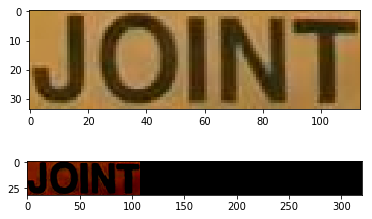

In [ ]:
import matplotlib.pyplot as plt
# Read the picture
raw_img = cv2.imread("/home/aistudio/work/word_1.png")
plt.figure()
plt.subplot(2,1,1)
# Visualize the original image
plt.imshow(raw_img)
# Scale and normalize
padding_im, draw_img = resize_norm_img(raw_img)
plt.subplot(2,1,2)
# Visual network input diagram
plt.imshow(draw_img)
plt.show()

**[Network Structure]**

* backbone

PaddleOCR uses MobileNetV3 as the backbone network. The networking sequence is consistent with the network structure. First, define the public modules in the network ([source code location](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/modeling/backbones/rec_mobilenet_v3.py)): `ConvBNLayer`, `ResidualUnit`, and `make_divisible`.

In [ ]:
import paddle
import paddle.nn as nn
import paddle.nn.functional as F

class ConvBNLayer(nn.Layer):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride,
                 padding,
                 groups=1,
                 if_act=True,
                 act=None):
        """
        Convolutional BN layer
        :param in_channels: number of input channels
        :param out_channels: Number of output channels
        :param kernel_size: Convolution kernel size
        :parma stride: stride size
        :param padding: padding size
        :param groups: the number of groups of the two-dimensional convolutional layer
        :param if_act: whether to add activation function
        :param act: activation function
        """
        super(ConvBNLayer, self).__init__()
        self.if_act = if_act
        self.act = act
        self.conv = nn.Conv2D(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding,
            groups=groups,
            bias_attr=False)

        self.bn = nn.BatchNorm(num_channels=out_channels, act=None)

    def forward(self, x):
        # conv layer
        x = self.conv(x)
        # batchnorm layer
        x = self.bn(x)
        # Whether to use activation function
        if self.if_act:
            if self.act == "relu":
                x = F.relu(x)
            elif self.act == "hardswish":
                x = F.hardswish(x)
            else:
                print("The activation function({}) is selected incorrectly.".
                      format(self.act))
                exit()
        return x

class SEModule(nn.Layer):
    def __init__(self, in_channels, reduction=4):
        """
        SE module
        :param in_channels: number of input channels
        :param reduction: channel zoom ratio
        """        
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2D(1)
        self.conv1 = nn.Conv2D(
            in_channels=in_channels,
            out_channels=in_channels // reduction,
            kernel_size=1,
            stride=1,
            padding=0)
        self.conv2 = nn.Conv2D(
            in_channels=in_channels // reduction,
            out_channels=in_channels,
            kernel_size=1,
            stride=1,
            padding=0)

    def forward(self, inputs):
        # Average pooling
        outputs = self.avg_pool(inputs)
        # First convolutional layer
        outputs = self.conv1(outputs)
        # relu activation function
        outputs = F.relu(outputs)
        # The second convolutional layer
        outputs = self.conv2(outputs)
        # hardsigmoid activation function
        outputs = F.hardsigmoid(outputs, slope=0.2, offset=0.5)
        return inputs * outputs


class ResidualUnit(nn.Layer):
    def __init__(self,
                 in_channels,
                 mid_channels,
                 out_channels,
                 kernel_size,
                 stride,
                 use_se,
                 act=None):
        """
        Residual layer
        :param in_channels: number of input channels
        :param mid_channels: number of intermediate channels
        :param out_channels: Number of output channels
        :param kernel_size: Convolution kernel size
        :parma stride: stride size
        :param use_se: whether to use se module
        :param act: activation function
        """ 
        super(ResidualUnit, self).__init__()
        self.if_shortcut = stride == 1 and in_channels == out_channels
        self.if_se = use_se

        self.expand_conv = ConvBNLayer(
            in_channels=in_channels,
            out_channels=mid_channels,
            kernel_size=1,
            stride=1,
            padding=0,
            if_act=True,
            act=act)
        self.bottleneck_conv = ConvBNLayer(
            in_channels=mid_channels,
            out_channels=mid_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=int((kernel_size - 1) // 2),
            groups=mid_channels,
            if_act=True,
            act=act)
        if self.if_se:
            self.mid_se = SEModule(mid_channels)
        self.linear_conv = ConvBNLayer(
            in_channels=mid_channels,
            out_channels=out_channels,
            kernel_size=1,
            stride=1,
            padding=0,
            if_act=False,
            act=None)

    def forward(self, inputs):
        x = self.expand_conv(inputs)
        x = self.bottleneck_conv(x)
        if self.if_se:
            x = self.mid_se(x)
        x = self.linear_conv(x)
        if self.if_shortcut:
            x = paddle.add(inputs, x)
        return x


def make_divisible(v, divisor=8, min_value=None):
    """
    Make sure to be divisible by 8
    """ 
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


Use public modules to build backbone networks:

In [ ]:
class MobileNetV3(nn.Layer):
    def __init__(self,
                 in_channels=3,
                 model_name='small',
                 scale=0.5,
                 small_stride=None,
                 disable_se=False,
                 **kwargs):
        super(MobileNetV3, self).__init__()
        self.disable_se = disable_se
        
        small_stride = [1, 2, 2, 2]

        if model_name == "small":
            cfg = [
                # k, exp, c,  se,     nl,  s,
                [3, 16, 16, True, 'relu', (small_stride[0], 1)],
                [3, 72, 24, False, 'relu', (small_stride[1], 1)],
                [3, 88, 24, False, 'relu', 1],
                [5, 96, 40, True, 'hardswish', (small_stride[2], 1)],
                [5, 240, 40, True, 'hardswish', 1],
                [5, 240, 40, True, 'hardswish', 1],
                [5, 120, 48, True, 'hardswish', 1],
                [5, 144, 48, True, 'hardswish', 1],
                [5, 288, 96, True, 'hardswish', (small_stride[3], 1)],
                [5, 576, 96, True, 'hardswish', 1],
                [5, 576, 96, True, 'hardswish', 1],
            ]
            cls_ch_squeeze = 576
        else:
            raise NotImplementedError("mode[" + model_name +
                                      "_model] is not implemented!")

        supported_scale = [0.35, 0.5, 0.75, 1.0, 1.25]
        assert scale in supported_scale, \
            "supported scales are {} but input scale is {}".format(supported_scale, scale)

        inplanes = 16
        # conv1
        self.conv1 = ConvBNLayer(
            in_channels=in_channels,
            out_channels=make_divisible(inplanes * scale),
            kernel_size=3,
            stride=2,
            padding=1,
            groups=1,
            if_act=True,
            act='hardswish')
        i = 0
        block_list = []
        inplanes = make_divisible(inplanes * scale)
        for (k, exp, c, se, nl, s) in cfg:
            se = se and not self.disable_se
            block_list.append(
                ResidualUnit(
                    in_channels=inplanes,
                    mid_channels=make_divisible(scale * exp),
                    out_channels=make_divisible(scale * c),
                    kernel_size=k,
                    stride=s,
                    use_se=se,
                    act=nl))
            inplanes = make_divisible(scale * c)
            i += 1
        self.blocks = nn.Sequential(*block_list)

        self.conv2 = ConvBNLayer(
            in_channels=inplanes,
            out_channels=make_divisible(scale * cls_ch_squeeze),
            kernel_size=1,
            stride=1,
            padding=0,
            groups=1,
            if_act=True,
            act='hardswish')

        self.pool = nn.MaxPool2D(kernel_size=2, stride=2, padding=0)
        self.out_channels = make_divisible(scale * cls_ch_squeeze)

    def forward(self, x):
        x = self.conv1(x)
        x = self.blocks(x)
        x = self.conv2(x)
        x = self.pool(x)
        return x


At this point, the definition of the backbone network is completed, and the entire network structure can be visualized through the paddle.summary structure:

In [ ]:
# Define the network input shape
IMAGE_SHAPE_C = 3
IMAGE_SHAPE_H = 32
IMAGE_SHAPE_W = 320


# Visual network structure
paddle.summary(MobileNetV3(),[(1, IMAGE_SHAPE_C, IMAGE_SHAPE_H, IMAGE_SHAPE_W)])

-------------------------------------------------------------------------------
   Layer (type)         Input Shape          Output Shape         Param #    
     Conv2D-1        [[1, 3, 32, 320]]     [1, 8, 16, 160]          216      
    BatchNorm-1      [[1, 8, 16, 160]]     [1, 8, 16, 160]          32       
   ConvBNLayer-1     [[1, 3, 32, 320]]     [1, 8, 16, 160]           0       
     Conv2D-2        [[1, 8, 16, 160]]     [1, 8, 16, 160]          64       
    BatchNorm-2      [[1, 8, 16, 160]]     [1, 8, 16, 160]          32       
   ConvBNLayer-2     [[1, 8, 16, 160]]     [1, 8, 16, 160]           0       
     Conv2D-3        [[1, 8, 16, 160]]     [1, 8, 16, 160]          72       
    BatchNorm-3      [[1, 8, 16, 160]]     [1, 8, 16, 160]          32       
   ConvBNLayer-3     [[1, 8, 16, 160]]     [1, 8, 16, 160]           0       
AdaptiveAvgPool2D-1  [[1, 8, 16, 160]]       [1, 8, 1, 1]            0       
     Conv2D-4          [[1, 8, 1, 1]]        [1, 2, 1, 1]     

{'total_params': 259056, 'trainable_params': 246736}

In [ ]:
# Picture input backbone network
backbone = MobileNetV3()
# Convert numpy data to Tensor
input_data = paddle.to_tensor([padding_im])
# Backbone network output
feature = backbone(input_data)
# View the latitude of the feature map
print("backbone output:", feature.shape)

backbone output: [1, 288, 1, 80]


* neck

The neck part converts the visual feature map output by the backbone into a 1-dimensional vector input and sends it to the LSTM network, and outputs the sequence feature ([source code location](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/modeling/necks/rnn.py)):

In [ ]:
class Im2Seq(nn.Layer):
    def __init__(self, in_channels, **kwargs):
        """
        Image feature is converted to sequence feature
        :param in_channels: number of input channels
        """ 
        super().__init__()
        self.out_channels = in_channels

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == 1
        x = x.squeeze(axis=2)
        x = x.transpose([0, 2, 1])  # (NWC)(batch, width, channels)
        return x

class EncoderWithRNN(nn.Layer):
    def __init__(self, in_channels, hidden_size):
        super(EncoderWithRNN, self).__init__()
        self.out_channels = hidden_size * 2
        self.lstm = nn.LSTM(
            in_channels, hidden_size, direction='bidirectional', num_layers=2)

    def forward(self, x):
        x, _ = self.lstm(x)
        return x


class SequenceEncoder(nn.Layer):
    def __init__(self, in_channels, hidden_size=48, **kwargs):
        """
        Sequence encoding
        :param in_channels: number of input channels
        :param hidden_size: hidden layer size
        """ 
        super(SequenceEncoder, self).__init__()
        self.encoder_reshape = Im2Seq(in_channels)

        self.encoder = EncoderWithRNN(
            self.encoder_reshape.out_channels, hidden_size)
        self.out_channels = self.encoder.out_channels

    def forward(self, x):
        x = self.encoder_reshape(x)
        x = self.encoder(x)
        return x


In [ ]:
neck = SequenceEncoder(in_channels=288)
sequence = neck(feature)
print("sequence shape:", sequence.shape)

sequence shape: [1, 80, 96]


* head
The prediction header part is composed of a fully connected layer and softmax, which is used to calculate the label probability distribution on the sequence feature time step. This example only supports the model to recognize 36 categories of lowercase English letters and numbers (26+10) ([source code location](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/modeling/heads/rec_ctc_head.py)):

In [ ]:
class CTCHead(nn.Layer):
    def __init__(self,
                 in_channels,
                 out_channels,
                 **kwargs):
        """
        CTC prediction layer
        :param in_channels: number of input channels
        :param out_channels: Number of output channels
        """ 
        super(CTCHead, self).__init__()
        self.fc = nn.Linear(
            in_channels,
            out_channels)
        
        # Thinking: How much should out_channels be equal to?
        self.out_channels = out_channels

    def forward(self, x):
        predicts = self.fc(x)
        result = predicts

        if not self.training:
            predicts = F.softmax(predicts, axis=2)
            result = predicts

        return result

In the case of random initialization of the network, the output results are disordered. After SoftMax, the prediction result with the highest probability at each time step can be obtained, where: `pred_id` represents the predicted tag ID, and `pre_scores` represents the predicted result Confidence:

In [ ]:
ctc_head = CTCHead(in_channels=96, out_channels=37)
predict = ctc_head(sequence)
print("predict shape:", predict.shape)
result = F.softmax(predict, axis=2)
pred_id = paddle.argmax(result, axis=2)
pred_socres = paddle.max(result, axis=2)
print("pred_id:", pred_id)
print("pred_scores:", pred_socres)

predict shape: [1, 80, 37]
pred_id: Tensor(shape=[1, 80], dtype=int64, place=CUDAPlace(0), stop_gradient=False,
       [[23, 28, 23, 23, 23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 31, 23, 23, 23, 23, 23, 23, 23, 31, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 5 ]])
pred_scores: Tensor(shape=[1, 80], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[0.03683758, 0.03368053, 0.03604801, 0.03504696, 0.03696444, 0.03597261, 0.03925638, 0.03650934, 0.03873367, 0.03572492, 0.03543066, 0.03618268, 0.03805700, 0.03496549, 0.03329032, 0.03565763, 0.03846950, 0.03922413, 0.03970327, 0.03638541, 0.03572393, 0.03618102, 0.03565401, 0.03636984, 0.03691722, 0.03718850, 0.03623354, 0.03877943, 0.03731697, 0.03563465, 0.03447339, 0.03365586, 0.03312979, 0.03285240, 0.03273271, 0.03269565, 0.03269779, 0.03271412, 0

* Post-processing

The final result returned by the recognition network is the maximum index value at each time step, and the final expected output is the corresponding text result. Therefore, the post-processing of CRNN is a decoding process. The main logic is as follows:

In [ ]:
def decode(text_index, text_prob=None, is_remove_duplicate=False):
    """ convert text-index into text-label. """
    character = "-0123456789abcdefghijklmnopqrstuvwxyz"
    result_list = []
    # Ignore tokens [0] represents the blank bit in ctc
    ignored_tokens = [0]
    batch_size = len(text_index)
    for batch_idx in range(batch_size):
        char_list = []
        conf_list = []
        for idx in range(len(text_index[batch_idx])):
            if text_index[batch_idx][idx] in ignored_tokens:
                continue
            # Combine the same characters between blank
            if is_remove_duplicate:
                # only for predict
                if idx > 0 and text_index[batch_idx][idx - 1] == text_index[
                        batch_idx][idx]:
                    continue
            # Store the decoded result in char_list
            char_list.append(character[int(text_index[batch_idx][
                idx])])
            # Record confidence
            if text_prob is not None:
                conf_list.append(text_prob[batch_idx][idx])
            else:
                conf_list.append(1)
        text = ''.join(char_list)
        # Output result
        result_list.append((text, np.mean(conf_list)))
    return result_list

Take the predicted result from the random initialization of the head part as an example, and decode it to get:

In [ ]:
pred_id = paddle.argmax(result, axis=2)
pred_socres = paddle.max(result, axis=2)
print(pred_id)
decode_out = decode(pred_id, pred_socres)
print("decode out:", decode_out)

Tensor(shape=[1, 80], dtype=int64, place=CUDAPlace(0), stop_gradient=False,
       [[23, 28, 23, 23, 23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 31, 23, 23, 23, 23, 23, 23, 23, 31, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 5 ]])
decode out: [('mrmmmmmmmmmtttummmmmmmummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm4', 0.034180813)]


**Quick test:** If the index of the input model is trained, is the decoding result correct?

In [ ]:
# Replace the predicted result of the model
right_pred_id = paddle.to_tensor([['xxxxxxxxxxxxx']])
tmp_scores = paddle.ones(shape=right_pred_id.shape)
out = decode(right_pred_id, tmp_scores)
print("out:",out)

out: [('pain', 1.0)]


The above steps complete the construction of the network and also realize a simple forward prediction process.

The untrained network cannot predict the result correctly. Therefore, it is necessary to define the loss function and optimization strategy to run the entire network. The network training principle will be described in detail below.


## 3. Detailed training principle
### 3.1 Prepare training data
PaddleOCR supports two data formats:
  -`lmdb` is used to train the data set (LMDBDataSet) stored in lmdb format;
  -`General Data` is used to train a data set (SimpleDataSet) stored in a text file;
 
  This time only introduces general data format reading

The default storage path of training data is `./train_data`, execute the following command to decompress the data:

In [ ]:
!cd /home/aistudio/work/train_data/ && tar xf ic15_data.tar 

After the decompression is complete, the training images are in the same folder, and there is a txt file (rec_gt_train.txt) that records the path and label of the image. The contents of the txt file are as follows:

```
"Image file name      Image annotation information"

train/word_1.png      Genaxis Theatre
train/word_2.png      [06]
...
```

**Note:** In the txt file, the picture path and picture label are divided by \t by default. If they are divided by other methods, it will cause training errors.


The data set should have the following file structure:
```
|-train_data
  |-ic15_data
    |- rec_gt_train.txt
    |- train
        |- word_001.png
        |- word_002.jpg
        |- word_003.jpg
        | ...
    |- rec_gt_test.txt
    |- test
        |- word_001.png
        |- word_002.jpg
        |- word_003.jpg
        | ...
```


Confirm whether the data path in the configuration file is correct, take [rec_icdar15_train.yml](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/configs/rec/rec_icdar15_train.yml) as an example:
```yaml
Train:
  dataset:
    name: SimpleDataSet
    # Training data root directory
    data_dir: ./train_data/ic15_data/
    # Training data label
    label_file_list: ["./train_data/ic15_data/rec_gt_train.txt"]
    transforms:
      - DecodeImage: # load image
          img_mode: BGR
          channel_first: False
      - CTCLabelEncode: # Class handling label
      - RecResizeImg:
          image_shape: [3, 32, 100]  # [3,32,320]
      - KeepKeys:
          keep_keys: ['image', 'label', 'length'] # dataloader will return list in this order
  loader:
    shuffle: True
    batch_size_per_card: 256
    drop_last: True
    num_workers: 8
    use_shared_memory: False

Eval:
  dataset:
    name: SimpleDataSet
    # Evaluate the data root directory
    data_dir: ./train_data/ic15_data
    # Evaluation data label
    label_file_list: ["./train_data/ic15_data/rec_gt_test.txt"]
    transforms:
      - DecodeImage: # load image
          img_mode: BGR
          channel_first: False
      - CTCLabelEncode: # Class handling label
      - RecResizeImg:
          image_shape: [3, 32, 100]
      - KeepKeys:
          keep_keys: ['image', 'label', 'length'] # dataloader will return list in this order
  loader:
    shuffle: False
    drop_last: False
    batch_size_per_card: 256
    num_workers: 4
    use_shared_memory: False
```

### 3.2 Data preprocessing

The training data sent to the network needs to ensure that the dimensions within a batch are consistent. At the same time, in order to have a certain numerical comparison of the features between different dimensions, the data needs to be uniformly scaled **zoom** and **normalized**.

In order to increase the robustness of the model, suppress over-fitting and improve generalization performance, a certain **data augmentation** needs to be implemented.

* Scaling and normalization

Related content has been introduced in the second section, which is the last step before the picture is sent to the network. Call `resize_norm_img` to complete image scaling, padding and normalization.

* Data augmentation

A variety of data augmentation methods are implemented in PaddleOCR, such as: color inversion, random cutting, affine change, random noise, etc., here is a simple random cutting as an example, more augmentation methods can be referred to: [rec_img_aug.py](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/data/imaug/rec_img_aug.py)

In [ ]:
def get_crop(image):
    """
    random crop
    """
    import random
    h, w, _ = image.shape
    top_min = 1
    top_max = 8
    top_crop = int(random.randint(top_min, top_max))
    top_crop = min(top_crop, h - 1)
    crop_img = image.copy()
    ratio = random.randint(0, 1)
    if ratio:
        crop_img = crop_img[top_crop:h, :, :]
    else:
        crop_img = crop_img[0:h - top_crop, :, :]
    return crop_img


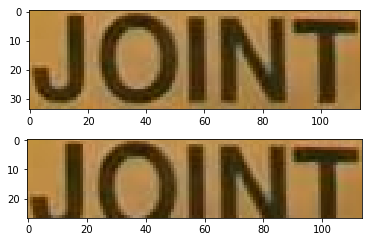

In [ ]:
# Read the picture
raw_img = cv2.imread("/home/aistudio/work/word_1.png")
plt.figure()
plt.subplot(2,1,1)
# Visualize the original image
plt.imshow(raw_img)
# Random cut
crop_img = get_crop(raw_img)
plt.subplot(2,1,2)
# Visual augmentation graph
plt.imshow(crop_img)
plt.show()

### 3.3 Main training program

The entry code for model training is [train.py](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/tools/train.py), which shows the various modules required in training: `build dataloader`, `build post process`, `build model`, `build loss`, `build optim`, `build metric`, after connecting all parts in series, you can start training:

* Build dataloader

The training model requires the data to be formed into a specified number of batches, which are sequentially yielded during the training process. In this example, the [SimpleDataSet](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3) implemented in PaddleOCR is called /ppocr/data/simple_dataset.py)

Based on the original code slightly modified, the main logic of returning a single piece of data is as follows:

In [ ]:
def __getitem__(data_line, data_dir):
    import os
    mode = "train"
    delimiter = '\t'
    try:
        substr = data_line.strip("\n").split(delimiter)
        file_name = substr[0]
        label = substr[1]
        img_path = os.path.join(data_dir, file_name)
        data = {'img_path': img_path, 'label': label}
        if not os.path.exists(img_path):
            raise Exception("{} does not exist!".format(img_path))
        with open(data['img_path'], 'rb') as f:
            img = f.read()
            data['image'] = img
        # Pre-processing operation, comment out first
        # outs = transform(data, self.ops)
        outs = data
    except Exception as e:
        print("When parsing line {}, error happened with msg: {}".format(
                data_line, e))
        outs = None
    return outs

Suppose the current input label is `train/word_1.png Genaxis Theatre`, the path of the training data is `/home/aistudio/work/train_data/ic15_data/`, the result of parsing is a dictionary containing `img_path` `label` `image` three fields:

In [ ]:
data_line = "train/word_1.png	Genaxis Theatre"
data_dir = "/home/aistudio/work/train_data/ic15_data/"

item = __getitem__(data_line, data_dir)
print(item)

{'img_path': '/home/aistudio/work/train_data/ic15_data/train/word_1.png', 'label': 'Genaxis Theatre', 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00Y\x00\x00\x00\x0e\x08\x02\x00\x00\x00\xcb\xe2\'\xb7\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x0bmIDATHK\x8d\x96\xf9S[\xd7\x15\x80\x01\xa7\x93\xa4\xfd1\x99L\xea\x80\xc4\xa2]B\x0bb\xdf\x84\x04\x18\x8c\x01\xb3\x8aE\xec\x12\x02\t\xb4KhC\xfb\xbe=\xed\xbb\x04\xc2l&N\xd2\xb4\x93i\x9bv\xa6\x7fL\xdb\xe9d\xe2N\xd3d<u6C\x8f\xc0I\x9c\xb1\x7f\xc8\x9d\x8f3\xf7\xdd\xf7\xee\x9d{\xbfw\xceC\x95\xd3\xc3\xe3\x04\x02\xe1\xad\xb7\xde\xbazv\xf9\xcd7\xdf<~\xfc\xf8\xef\xff\xfc\xc7\xe7\x9f\xff\xfb\x7fO\x9f>y\xf2\xe4\xeb\xaf\xbf\xbe\xbc\xbc|\xedWU\xaf]\xb7\xab\xab\xab\xca\xca\xab\x8a\x8a\x8a\xca\xca\xca\xeb\x08\x97\xb7\xa0sY\xf1\xda\xf7\xdf?\x83vUYQUU\x05wa\xd6w\xcf\x9

After realizing the return logic of a single piece of data, call `padde.io.Dataloader` to combine the data into a batch. For details, please refer to [build_dataloader](https://github.com/PaddlePaddle/PaddleOCR/blob/95c670faf6cf4551c841764cde43a4f4d9d5e634/ppocr/data/__init__.py#L52).


* build model

   The build model is to build the main network structure. The specific details are as described in "2.3 Code Implementation". This section will not introduce too much. For the code of each module, please refer to [modeling](https://github.com/PaddlePaddle/PaddleOCR/tree/release/2.3/ppocr/modeling)

* build loss
  
   The loss function of the CRNN model is CTC loss, and the flying paddle integrates the commonly used Loss function. You only need to call the implementation:

In [ ]:
import paddle.nn as nn
class CTCLoss(nn.Layer):
    def __init__(self, use_focal_loss=False, **kwargs):
        super(CTCLoss, self).__init__()
        # blank is a meaningless connector for ctc
        self.loss_func = nn.CTCLoss(blank=0, reduction='none')

    def forward(self, predicts, batch):
        if isinstance(predicts, (list, tuple)):
            predicts = predicts[-1]
        # Transpose the prediction results of the head layer of the model, arranged along the channel layer
        predicts = predicts.transpose((1, 0, 2)) #[80,1,37]
        N, B, _ = predicts.shape
        preds_lengths = paddle.to_tensor([N] * B, dtype='int64')
        labels = batch[1].astype("int32")
        label_lengths = batch[2].astype('int64')
        # Calculate the loss function
        loss = self.loss_func(predicts, labels, preds_lengths, label_lengths)
        loss = loss.mean()
        return {'loss': loss}

* build post process

The specific details are also introduced in "2.3 Code Implementation", and the implementation logic is the same as before.

* build optim

The optimizer uses `Adam` and also calls the flying paddle API: `paddle.optimizer.Adam`

* build metric

The metric part is used to calculate model indicators. In PaddleOCR's text recognition, the prediction of the entire sentence is judged to be correct. Therefore, the main logic of the accuracy rate calculation is as follows:

In [ ]:
def metric(preds, labels):    
    correct_num = 0
    all_num = 0
    norm_edit_dis = 0.0
    for (pred), (target) in zip(preds, labels):
        pred = pred.replace(" ", "")
        target = target.replace(" ", "")
        if pred == target:
            correct_num += 1
        all_num += 1
    correct_num += correct_num
    all_num += all_num
    return {
        'acc': correct_num / all_num,
    }

In [ ]:
preds = ["aaa", "bbb", "ccc", "123", "456"]
labels = ["aaa", "bbb", "ddd", "123", "444"]
acc = metric(preds, labels)
print("acc:", acc)
# Among the five prediction results, 3 are completely correct, so the accuracy rate should be 0.6

acc: {'acc': 0.6}


Combining the above parts is the complete training process:

In [ ]:

def main(config, device, logger, vdl_writer):
    # init dist environment
    if config['Global']['distributed']:
        dist.init_parallel_env()

    global_config = config['Global']

    # build dataloader
    train_dataloader = build_dataloader(config, 'Train', device, logger)
    if len(train_dataloader) == 0:
        logger.error(
            "No Images in train dataset, please ensure\n" +
            "\t1. The images num in the train label_file_list should be larger than or equal with batch size.\n"
            +
            "\t2. The annotation file and path in the configuration file are provided normally."
        )
        return

    if config['Eval']:
        valid_dataloader = build_dataloader(config, 'Eval', device, logger)
    else:
        valid_dataloader = None

    # build post process
    post_process_class = build_post_process(config['PostProcess'],
                                            global_config)

    # build model
    # for rec algorithm
    if hasattr(post_process_class, 'character'):
        char_num = len(getattr(post_process_class, 'character'))
        if config['Architecture']["algorithm"] in ["Distillation",
                                                   ]:  # distillation model
            for key in config['Architecture']["Models"]:
                config['Architecture']["Models"][key]["Head"][
                    'out_channels'] = char_num
        else:  # base rec model
            config['Architecture']["Head"]['out_channels'] = char_num

    model = build_model(config['Architecture'])
    if config['Global']['distributed']:
        model = paddle.DataParallel(model)

    # build loss
    loss_class = build_loss(config['Loss'])

    # build optim
    optimizer, lr_scheduler = build_optimizer(
        config['Optimizer'],
        epochs=config['Global']['epoch_num'],
        step_each_epoch=len(train_dataloader),
        parameters=model.parameters())

    # build metric
    eval_class = build_metric(config['Metric'])
    # load pretrain model
    pre_best_model_dict = load_model(config, model, optimizer)
    logger.info('train dataloader has {} iters'.format(len(train_dataloader)))
    if valid_dataloader is not None:
        logger.info('valid dataloader has {} iters'.format(
            len(valid_dataloader)))

    use_amp = config["Global"].get("use_amp", False)
    if use_amp:
        AMP_RELATED_FLAGS_SETTING = {
            'FLAGS_cudnn_batchnorm_spatial_persistent': 1,
            'FLAGS_max_inplace_grad_add': 8,
        }
        paddle.fluid.set_flags(AMP_RELATED_FLAGS_SETTING)
        scale_loss = config["Global"].get("scale_loss", 1.0)
        use_dynamic_loss_scaling = config["Global"].get(
            "use_dynamic_loss_scaling", False)
        scaler = paddle.amp.GradScaler(
            init_loss_scaling=scale_loss,
            use_dynamic_loss_scaling=use_dynamic_loss_scaling)
    else:
        scaler = None

    # start train
    program.train(config, train_dataloader, valid_dataloader, device, model,
                  loss_class, optimizer, lr_scheduler, post_process_class,
                  eval_class, pre_best_model_dict, logger, vdl_writer, scaler)

## 4. Complete training task

### 4.1 Start training

PaddleOCR recognition task is similar to detection task, which transmits parameters through configuration files.

To perform a complete model training, you first need to download the entire project and install related dependencies:

In [ ]:
# Clone PaddleOCR code
#!git clone https://gitee.com/paddlepaddle/PaddleOCR
# Modify the default directory where the code runs to /home/aistudio/PaddleOCR
import os
os.chdir("/home/aistudio/PaddleOCR")
# Install PaddleOCR third-party dependencies
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 12.5 MB 8.4 MB/s            
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.1
    Uninstalling scikit-image-0.19.1:
      Successfully uninstalled scikit-image-0.19.1


Create a soft link and place the training data under the PaddleOCR project:

In [ ]:
!ln -s /home/aistudio/work/train_data/ /home/aistudio/PaddleOCR/

Download the pre-trained model:

In order to speed up the convergence speed, it is recommended to download the trained model and perform finetune on the icdar2015 data

In [ ]:
!cd PaddleOCR/
# Download the pre-trained model of MobileNetV3
!wget -nc -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/rec_mv3_none_bilstm_ctc_v2.0_train.tar
# Decompress model parameters
!tar -xf pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar && rm -rf pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar

--2021-12-22 15:39:39--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/rec_mv3_none_bilstm_ctc_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51200000 (49M) [application/x-tar]
Saving to: ‘./pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar’

rec_mv3_none_bilstm 100%[===================>]  48.83M  15.5MB/s    in 3.6s    

2021-12-22 15:39:42 (13.7 MB/s) - ‘./pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar’ saved [51200000/51200000]



Starting the training command is very simple, just specify the configuration file. In addition, in the command line, you can use `-o` to modify the parameter values in the configuration file. Start the training command as shown below

in:

* `Global.pretrained_model`: Loaded pretrained model path
* `Global.character_dict_path`: dictionary path (only 26 lowercase letters + numbers are supported here)
* `Global.eval_batch_step`: evaluation frequency
* `Global.epoch_num`: total number of training rounds



In [4]:
!python3 tools/train.py -c configs/rec/rec_icdar15_train.yml \
   -o Global.pretrained_model=rec_mv3_none_bilstm_ctc_v2.0_train/best_accuracy \
   Global.character_dict_path=ppocr/utils/ic15_dict.txt \
   Global.eval_batch_step=[0,200] \
   Global.epoch_num=40

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

According to the `save_model_dir` field set in the configuration file, the following parameters will be saved:

```
output/rec/ic15
├── best_accuracy.pdopt  
├── best_accuracy.pdparams  
├── best_accuracy.states  
├── config.yml  
├── iter_epoch_3.pdopt  
├── iter_epoch_3.pdparams  
├── iter_epoch_3.states  
├── latest.pdopt  
├── latest.pdparams  
├── latest.states  
└── train.log
```
Among them, `best_accuracy.*` is the best model on the evaluation set; `iter_epoch_x.*` is the model saved at intervals of `save_epoch_step`; `latest.*` is the model of the last epoch.


**Summarize:**

If you need to train your own data, you need to modify:

1. Training and evaluation data path (required)
2. Dictionary path (required)
3. Pre-trained model (optional)
4. Learning rate, image shape, network structure (optional)

### 4.2 Model Evaluation


The evaluation data set can be modified by `configs/rec/rec_icdar15_train.yml` to modify the `label_file_path` setting in Eval.

The evaluation set of icdar2015 is used by default here, and the weights of the newly trained model are loaded:

In [ ]:
!python tools/eval.py -c configs/rec/rec_icdar15_train.yml -o Global.checkpoints=output/rec/ic15/best_accuracy \
        Global.character_dict_path=ppocr/utils/ic15_dict.txt


[2021/12/23 14:27:51] root INFO: Architecture : 
[2021/12/23 14:27:51] root INFO:     Backbone : 
[2021/12/23 14:27:51] root INFO:         model_name : large
[2021/12/23 14:27:51] root INFO:         name : MobileNetV3
[2021/12/23 14:27:51] root INFO:         scale : 0.5
[2021/12/23 14:27:51] root INFO:     Head : 
[2021/12/23 14:27:51] root INFO:         fc_decay : 0
[2021/12/23 14:27:51] root INFO:         name : CTCHead
[2021/12/23 14:27:51] root INFO:     Neck : 
[2021/12/23 14:27:51] root INFO:         encoder_type : rnn
[2021/12/23 14:27:51] root INFO:         hidden_size : 96
[2021/12/23 14:27:51] root INFO:         name : SequenceEncoder
[2021/12/23 14:27:51] root INFO:     Transform : None
[2021/12/23 14:27:51] root INFO:     algorithm : CRNN
[2021/12/23 14:27:51] root INFO:     model_type : rec
[2021/12/23 14:27:51] root INFO: Eval : 
[2021/12/23 14:27:51] root INFO:     dataset : 
[2021/12/23 14:27:51] root INFO:         data_dir : ./train_data/ic15_data
[2021/12/23 14:27:51]

After the evaluation, you can see the accuracy of the training model on the validation set.

PaddleOCR supports alternate training and evaluation. You can modify the evaluation frequency of `eval_batch_step` in `configs/rec/rec_icdar15_train.yml`. The evaluation frequency is set every 2000 iter by default. In the evaluation process, the best acc model is saved as `output/rec/ic15/best_accuracy` by default.

If the validation set is large, the test will be more time-consuming. It is recommended to reduce the number of evaluations or perform the evaluation after training.

### 4.3 Forecast

Using the model trained by PaddleOCR, you can use the following script to make quick predictions.

Forecast picture:
![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.3/doc/imgs_words_en/word_19.png)

The default prediction image is stored in `infer_img`, and the trained parameter file is loaded through `-o Global.checkpoints`:

In [ ]:
!python tools/infer_rec.py -c configs/rec/rec_icdar15_train.yml -o Global.checkpoints=output/rec/ic15/best_accuracy Global.character_dict_path=ppocr/utils/ic15_dict.txt

[2021/12/23 14:29:19] root INFO: Architecture : 
[2021/12/23 14:29:19] root INFO:     Backbone : 
[2021/12/23 14:29:19] root INFO:         model_name : large
[2021/12/23 14:29:19] root INFO:         name : MobileNetV3
[2021/12/23 14:29:19] root INFO:         scale : 0.5
[2021/12/23 14:29:19] root INFO:     Head : 
[2021/12/23 14:29:19] root INFO:         fc_decay : 0
[2021/12/23 14:29:19] root INFO:         name : CTCHead
[2021/12/23 14:29:19] root INFO:     Neck : 
[2021/12/23 14:29:19] root INFO:         encoder_type : rnn
[2021/12/23 14:29:19] root INFO:         hidden_size : 96
[2021/12/23 14:29:19] root INFO:         name : SequenceEncoder
[2021/12/23 14:29:19] root INFO:     Transform : None
[2021/12/23 14:29:19] root INFO:     algorithm : CRNN
[2021/12/23 14:29:19] root INFO:     model_type : rec
[2021/12/23 14:29:19] root INFO: Eval : 
[2021/12/23 14:29:19] root INFO:     dataset : 
[2021/12/23 14:29:19] root INFO:         data_dir : ./train_data/ic15_data
[2021/12/23 14:29:19]

Get the prediction result of the input image:

```
infer_img: doc/imgs_words_en/word_19.png
        result: slow	0.8795223
```


### Assignment

**[Question 1]**

Visualize the [Data Enhancement](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.4/ppocr/data/imaug/rec_img_aug.py) results implemented in PaddleOCR: noise, jitter, and explain the effect in language .

Optional test picture:

![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.4/doc/imgs_words/ch/word_1.jpg)

![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.4/doc/imgs_words/ch/word_2.jpg)

![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.4/doc/imgs_words/ch/word_3.jpg)


**[Question 2]**

Replace the backbone in the configs/rec/rec_icdar15_train.yml configuration with [ResNet34_vd] in PaddleOCR (https://github.com/PaddlePaddle/PaddleOCR/blob/6ee301be36eb54d91dc437842f754593dce13967/ppocr/modeling/#resbones/whendre.py) When the input image shape is (3, 32, 100), what is the final output feature size of the Head layer?


**[Question 3]**

Download the 10W Chinese data set [rec_data_lesson_demo](https://paddleocr.bj.bcebos.com/dataset/rec_data_lesson_demo.tar), modify the configs/rec/rec_icdar15_train.yml configuration file to train a recognition model and provide the training log.

Loadable pre-training model: https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/rec_mv3_none_bilstm_ctc_v2.0_train.tar


## Summarize

At this point, a CRNN-based text recognition task has been completed. For more functions and codes, please refer to [PaddleOCR](https://github.com/PaddlePaddle/PaddleOCR).

If you have any questions or questions about the project, please leave a message in the comment area.